## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import torch
import torch.nn as nn

PATH = './'

In [2]:
df = pd.read_csv(PATH+'6_class.csv', index_col='Unnamed: 0')

In [3]:
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 13.1+ KB


None

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


In [4]:
display(df['Star color'].value_counts())

colors = {'Blue White': 'Blue_white', 
            'Blue white': 'Blue_white', 
            'Blue-white': 'Blue_white',
            'Blue white ': 'Blue_white', 
            'Blue-White': 'Blue_white', 
            'Red':'Red', 
            'White':'White',
            'white':'White', 
            'Blue':'Blue', 
            'Blue ' :'Blue', 
            'Yellowish White': 'Yellowish_White',
            'yellow-white': 'Yellowish_White', 
            'White-Yellow': 'White_Yellow',
            'yellowish' : 'Yellowish', 
            'Yellowish': 'Yellowish',
            'Orange':'Orange', 
            'Whitish' : 'Whitish', 
            'Orange-Red' : 'Orange_Red',
            'Pale yellow orange' :'Pale_yellow_orange'
            }

df['Star color'].replace(colors, inplace=True)
rife_stars = df['Star color'].value_counts()[df['Star color'].value_counts() > 5].index
df = df.loc[df['Star color'].isin(rife_stars)]

display(df['Star color'].value_counts())

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

Red                112
Blue                56
Blue_white          41
Yellowish_White     11
White               10
Name: Star color, dtype: int64

<AxesSubplot: xlabel='Temperature (K)', ylabel='Count'>

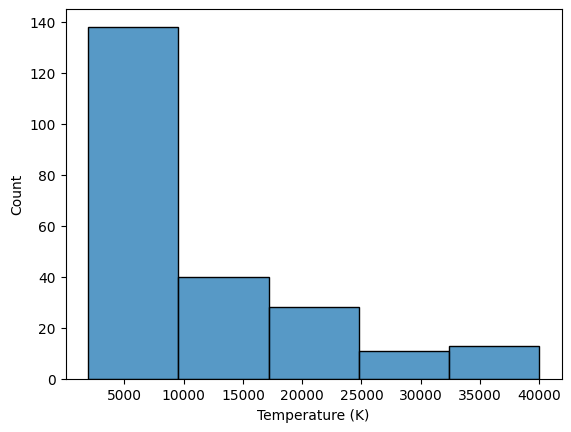

In [5]:
sns.histplot(df['Temperature (K)'], bins=5)

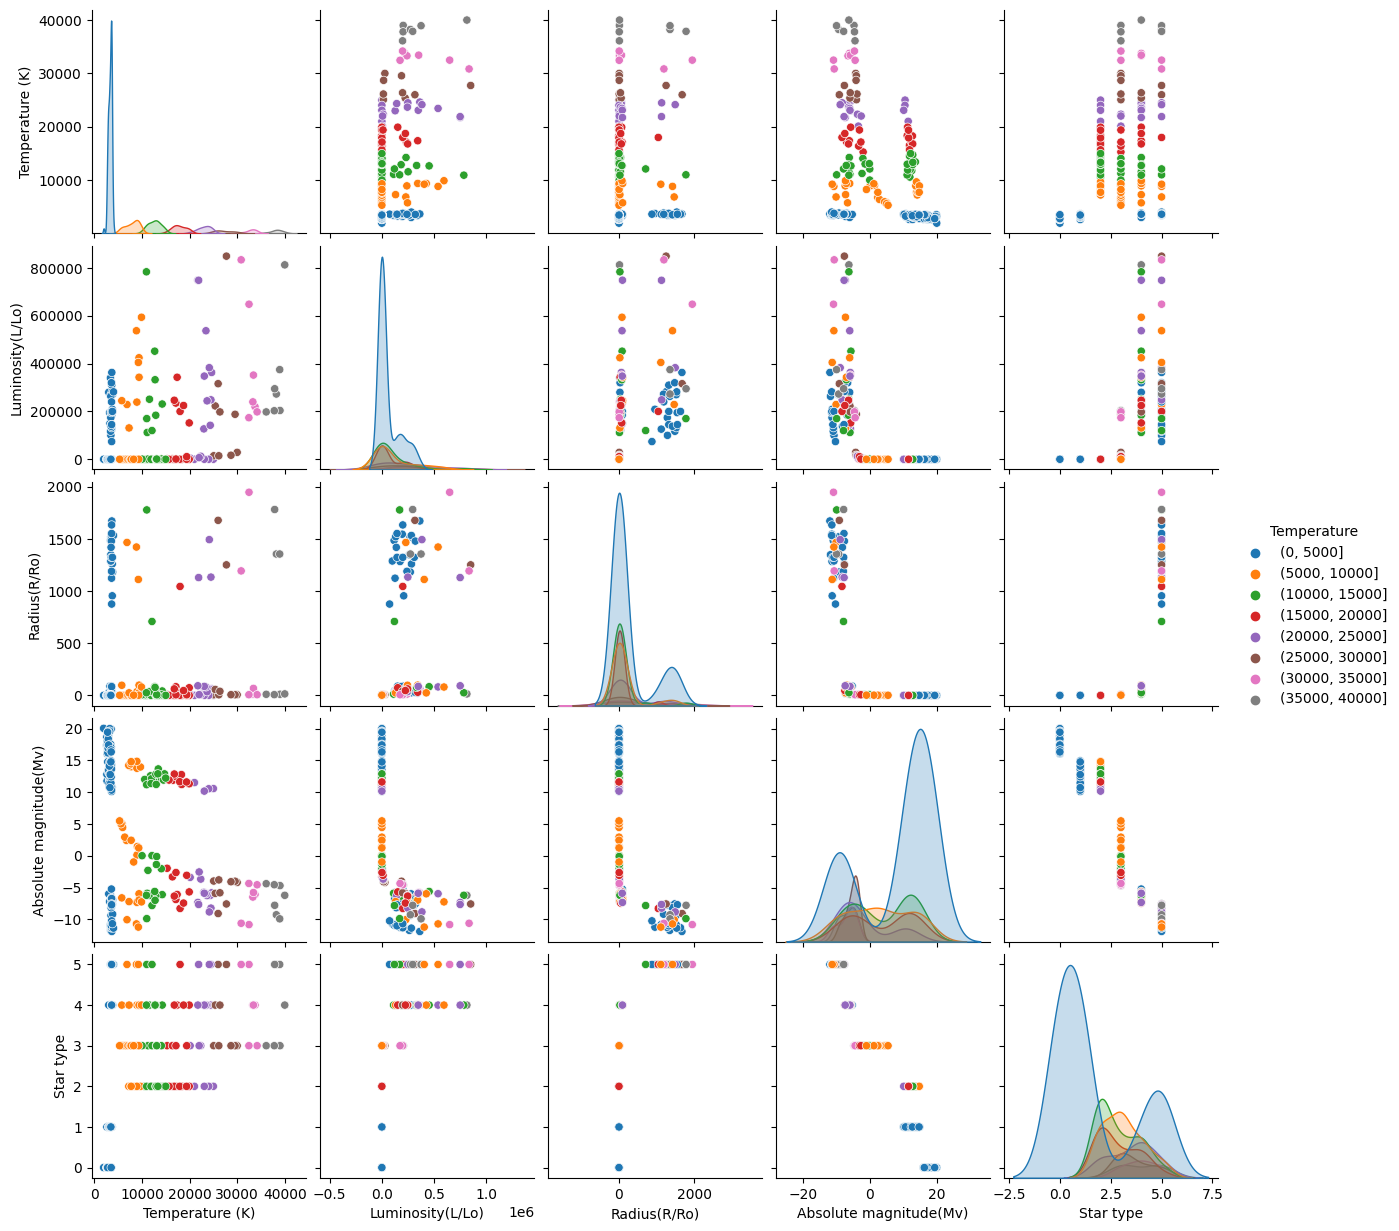

In [6]:
# df['Temperature'] = pd.qcut(df['Temperature (K)'], 3, labels=range(3)).astype('int')
df['Temperature'] = pd.cut(df['Temperature (K)'],
                           bins=np.arange(0, 40000+1, 5000))
sns.pairplot(df,
             hue = 'Temperature')
plt.show()

## Предобработка и анализ данных

In [7]:
display(df.head())
display(df.shape)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Temperature
0,3068,0.002400,0.1700,16.12,0,Red,"(0, 5000]"
1,3042,0.000500,0.1542,16.60,0,Red,"(0, 5000]"
2,2600,0.000300,0.1020,18.70,0,Red,"(0, 5000]"
3,2800,0.000200,0.1600,16.65,0,Red,"(0, 5000]"
4,1939,0.000138,0.1030,20.06,0,Red,"(0, 5000]"


(230, 7)

In [8]:
X = df.drop(['Temperature (K)', 'Temperature'], axis=1)
y = df['Temperature (K)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=99, shuffle=True, stratify=df['Temperature'])

In [9]:
nums = X.select_dtypes(exclude='object').columns.to_list()
cats = X.select_dtypes(include='object').columns.to_list()

In [10]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_scaled = scaler.fit_transform(X_train[nums])
X_train_encoded = encoder.fit_transform(X_train[cats])
X_train = np.concatenate([X_train_scaled, X_train_encoded], axis=1)

X_test_scaled = scaler.transform(X_test[nums])
X_test_encoded = encoder.transform(X_test[cats])
X_test = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

In [11]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train.values)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test.values)

In [12]:
X_train.shape

torch.Size([184, 9])

## Построение базовой нейронной сети

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, n_neurons=[64, 32, 16, 8, 1], dropout_p=0.3, activation=nn.ReLU()):
        super(NeuralNet, self).__init__()

        net_layers = []
        for i in range(1, len(n_neurons) - 1):
            net_layers.append(nn.Linear(n_neurons[i-1], n_neurons[i]))
            net_layers.append(nn.BatchNorm1d(n_neurons[i]))
            net_layers.append(activation)
            net_layers.append(nn.Dropout(dropout_p))
        net_layers.append(nn.Linear(n_neurons[-2], n_neurons[-1]))
        
        self.fc = nn.Sequential(*net_layers)
        
    def forward(self, x):
        return self.fc(x).flatten()

In [14]:
net = NeuralNet(n_neurons=[9, 128, 64, 32, 16, 1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

for param in net.fc:
    if isinstance(param, nn.Linear):
        nn.init.kaiming_normal_(param.weight)
        nn.init.uniform_(param.bias)

net

NeuralNet(
  (fc): Sequential(
    (0): Linear(in_features=9, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=32, out_features=16, bias=True)
    (13): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [15]:
def train(model, optimizer, criterion,
          train_list, test_list,
          num_epochs=5, batch_size=8, print_every=1, verbose=True):
    
    num_batches = ceil(len(X_train)/batch_size)
    
    for epoch in range(num_epochs):
        loss_train = 0
        order = np.random.permutation(len(X_train))
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = model.forward(X_batch)
            loss_value = criterion(preds, y_batch)
            loss_train += loss_value.item()

            loss_value.backward()
            optimizer.step()

        if (epoch+1) % print_every == 0:
            with torch.no_grad():
                model.eval()
                test_preds = model.forward(X_test)
                loss_test = criterion(test_preds, y_test).item()
                if (verbose==True):
                    print(f'Эпоха {epoch+1}', '\n',
                          f'RMSE на тренировочной выборке {loss_train**(1/2)/num_batches:.2f}', '\n',
                          f'RMSE не тестировочной выборке {loss_test**(1/2):.2f}')
                train_list.append(loss_train**(1/2)/num_batches)
                test_list.append(loss_test**(1/2))
            model.train()

In [16]:
train_list = []
test_list = []
train(net, optimizer, criterion,
      train_list, test_list,
      num_epochs=100, batch_size=16, print_every=10,
      verbose=True)

Эпоха 10 
 RMSE на тренировочной выборке 3868.78 
 RMSE не тестировочной выборке 13485.85
Эпоха 20 
 RMSE на тренировочной выборке 2735.20 
 RMSE не тестировочной выборке 9785.88
Эпоха 30 
 RMSE на тренировочной выборке 2009.86 
 RMSE не тестировочной выборке 6322.19
Эпоха 40 
 RMSE на тренировочной выборке 1685.81 
 RMSE не тестировочной выборке 5301.21
Эпоха 50 
 RMSE на тренировочной выборке 1461.04 
 RMSE не тестировочной выборке 4624.79
Эпоха 60 
 RMSE на тренировочной выборке 1602.35 
 RMSE не тестировочной выборке 4755.06
Эпоха 70 
 RMSE на тренировочной выборке 1618.57 
 RMSE не тестировочной выборке 4685.36
Эпоха 80 
 RMSE на тренировочной выборке 1670.78 
 RMSE не тестировочной выборке 3610.31
Эпоха 90 
 RMSE на тренировочной выборке 1596.86 
 RMSE не тестировочной выборке 4651.94
Эпоха 100 
 RMSE на тренировочной выборке 1616.92 
 RMSE не тестировочной выборке 4667.41


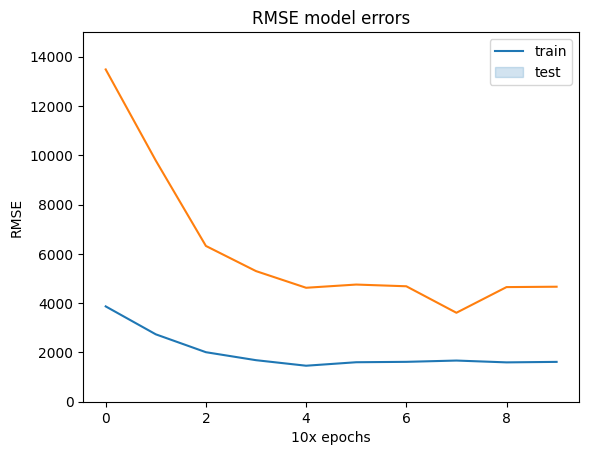

In [17]:
sns.lineplot(y=train_list, x=range(len(train_list)))
sns.lineplot(y=test_list, x=range(len(test_list)))

plt.title('RMSE model errors')
plt.ylabel('RMSE')
plt.xlabel('10x epochs')
plt.ylim(bottom=0, top=15000)
plt.legend(['train', 'test'])

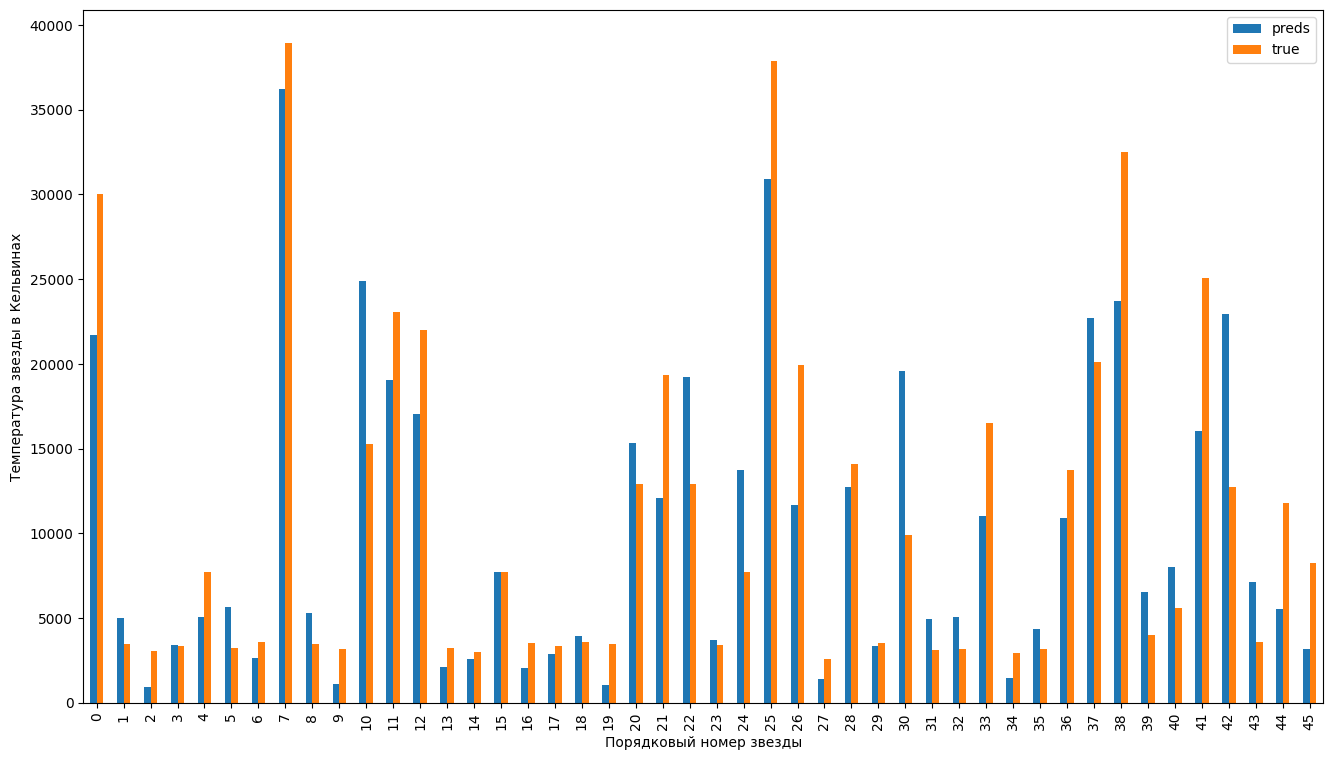

In [18]:
with torch.no_grad():
    preds_test = net.forward(X_test).cpu().detach().numpy()

preds_series = pd.DataFrame(preds_test.reshape(-1, 1), columns=['preds'])
test_series = pd.DataFrame(y_test.numpy(), columns=['true'])
visual = pd.concat([preds_series, test_series], axis=1)

visual.plot(kind='bar',
            figsize=(16, 9), xlabel = 'Порядковый номер звезды', ylabel = 'Температура звезды в Кельвинах')
plt.show()

## Улучшение нейронной сети

In [19]:
%%time
report_data = []

dropouts = [0., 0.3, 0.5]
num_epochs = [100, 200, 300]
batch_sizes = [8, 16, 32]

################################################################# Params
for dropout in dropouts:
    for num_epoch in num_epochs:
        for batch_size in batch_sizes:
            
################################################################# Model
            net = NeuralNet(n_neurons=[9, 128, 64, 32, 16, 1], dropout_p=dropout)
            criterion = nn.MSELoss()
            optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

            for param in net.fc:
                if isinstance(param, nn.Linear):
                    nn.init.kaiming_normal_(param.weight)
                    nn.init.uniform_(param.bias)
                    
################################################################# Training
            train_list = []
            test_list = []
            train(net, optimizer, criterion,
                  train_list, test_list,
                  num_epochs=num_epoch, batch_size=batch_size, print_every=5, verbose=False)
            with torch.no_grad(): test_preds = net.forward(X_test).cpu().detach().numpy()
            
################################################################# Report
            report_data.append([dropout, num_epoch, batch_size, train_list, test_list, test_preds])

CPU times: user 15min 48s, sys: 4.64 s, total: 15min 53s
Wall time: 2min 42s


In [20]:
data = pd.DataFrame(report_data, columns=['dropout', 'num_epoch', 'batch_size', 'train_scores', 'test_scores', 'test_preds'])
data['test_scores_low20'] = data['test_scores'].apply(lambda x: pd.Series(x).quantile(0.2))
data.sort_values('test_scores_low20', inplace=True)

In [21]:
data.head(5)

,dropout,num_epoch,batch_size,train_scores,test_scores,test_preds,test_scores_low20
5,0.0,200,32,"[5940.679983526016, 5744.93802306769, 5556.815...","[14606.511424703709, 14376.2070101957, 14077.0...","[25919.502, 3702.868, 3280.6387, 3480.9336, 95...",3172.175310
8,0.0,300,32,"[5903.1768848081565, 5772.237155365135, 5598.9...","[14579.357461836238, 14312.091112063254, 13903...","[27170.727, 3833.5925, 3069.1277, 3474.0857, 8...",3289.395146
7,0.0,300,16,"[4059.0131942519124, 3843.9146495900936, 3301....","[14372.450313012045, 13295.534287872752, 11610...","[27771.566, 3805.1514, 3550.6936, 4290.6245, 1...",3414.166296
4,0.0,200,16,"[4094.2499380906825, 3834.7172429441694, 3458....","[14445.126513810808, 13262.395560380484, 11849...","[23897.266, 3972.5615, 4188.392, 3249.6018, 10...",3660.187264
17,0.3,300,32,"[5871.834996167912, 5781.477319855195, 5679.26...","[14614.161898651595, 14500.009931031082, 14149...","[20195.355, 3827.3582, 2264.8643, 4986.0103, 9...",3767.271569


Model with params dropout - 0.0, 
          num_epoch - 200, 
          batch_size - 32, 
          has last test RMSE error - 3172.18


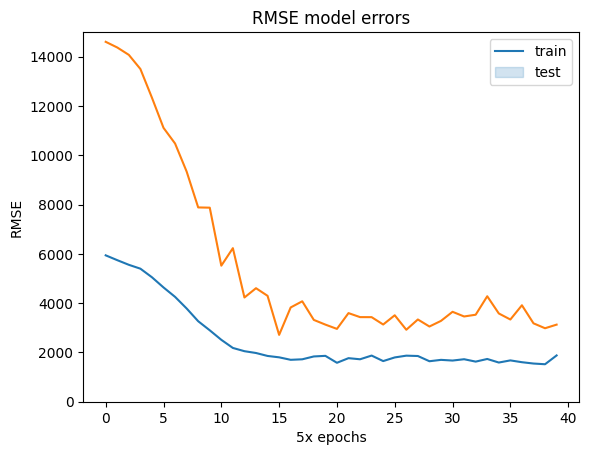

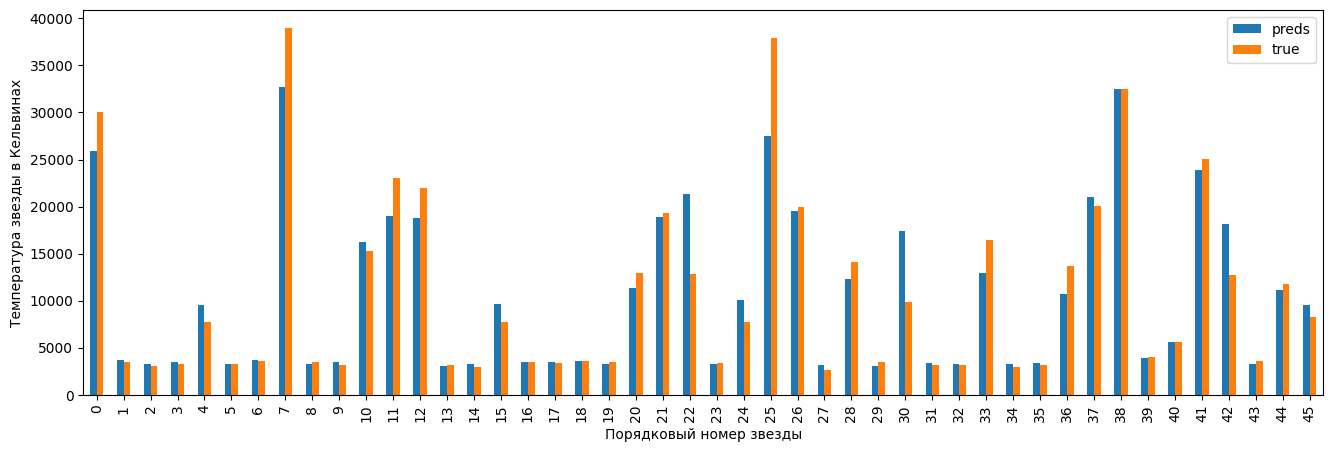

######################################################################
Model with params dropout - 0.0, 
          num_epoch - 300, 
          batch_size - 32, 
          has last test RMSE error - 3289.40


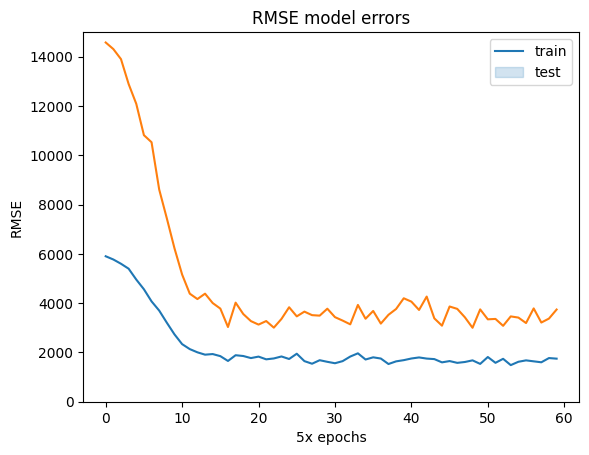

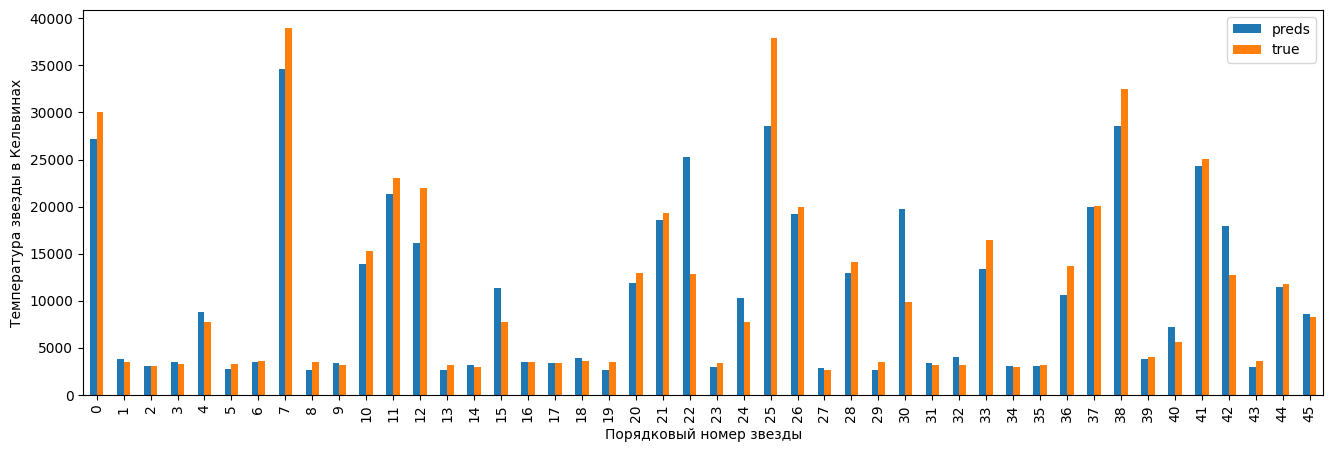

######################################################################
Model with params dropout - 0.0, 
          num_epoch - 300, 
          batch_size - 16, 
          has last test RMSE error - 3414.17


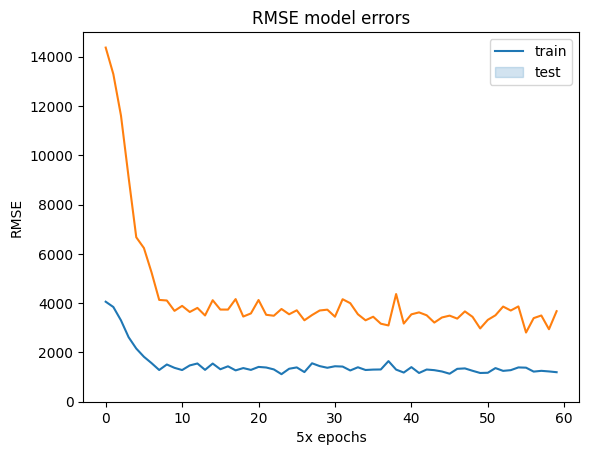

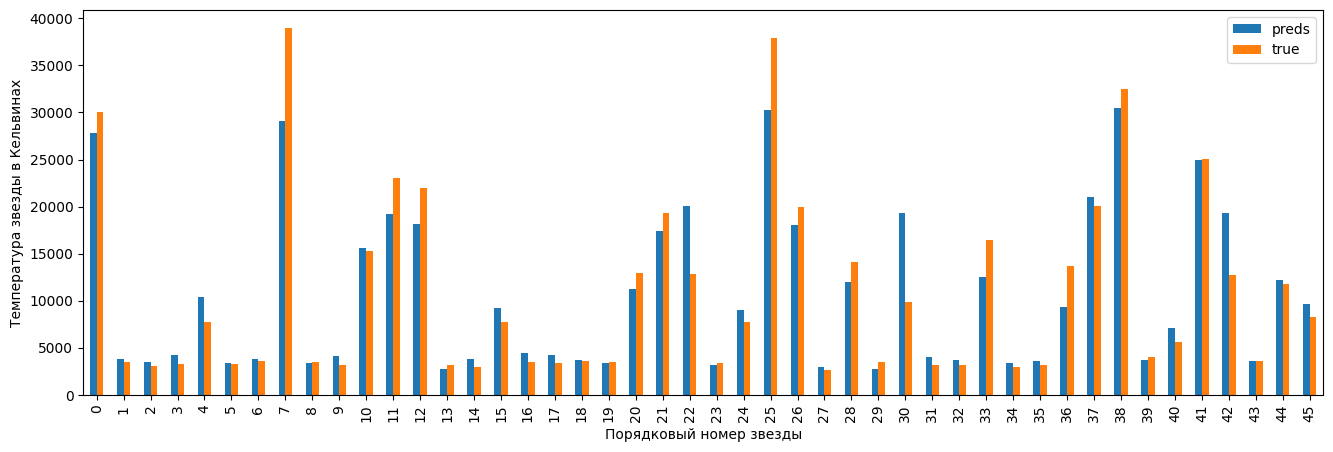

######################################################################
Model with params dropout - 0.0, 
          num_epoch - 200, 
          batch_size - 16, 
          has last test RMSE error - 3660.19


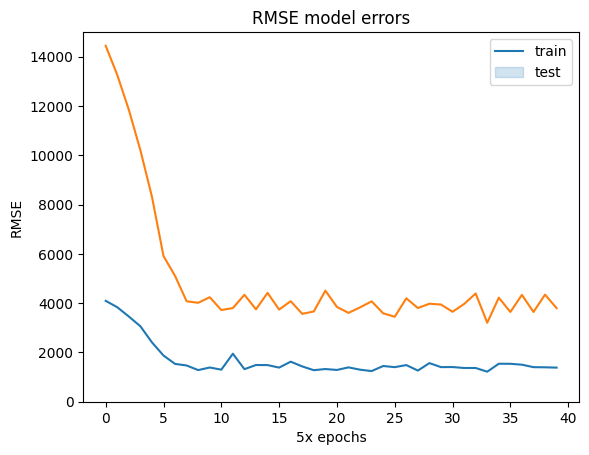

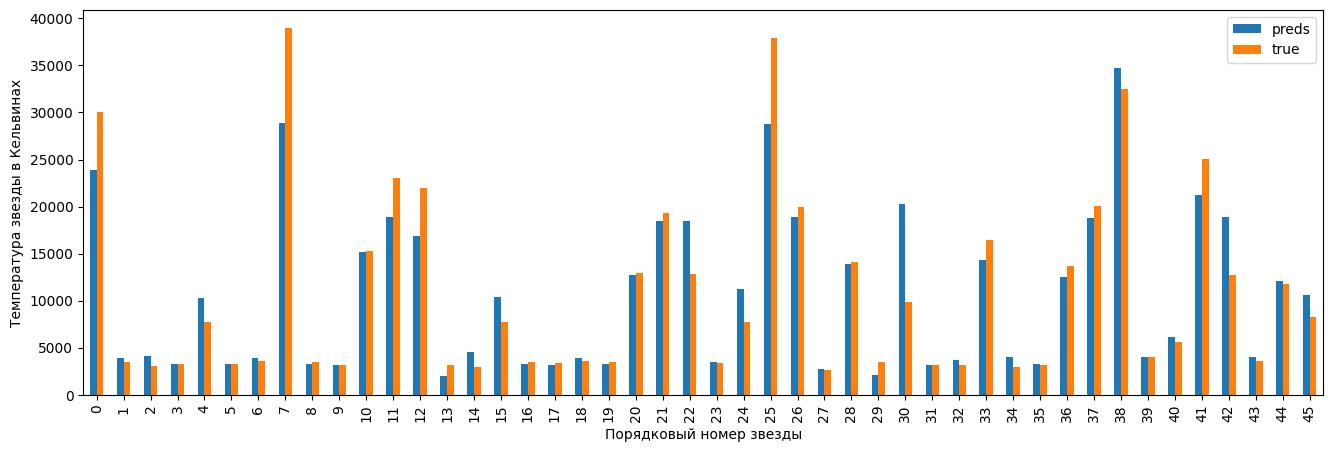

######################################################################
Model with params dropout - 0.3, 
          num_epoch - 300, 
          batch_size - 32, 
          has last test RMSE error - 3767.27


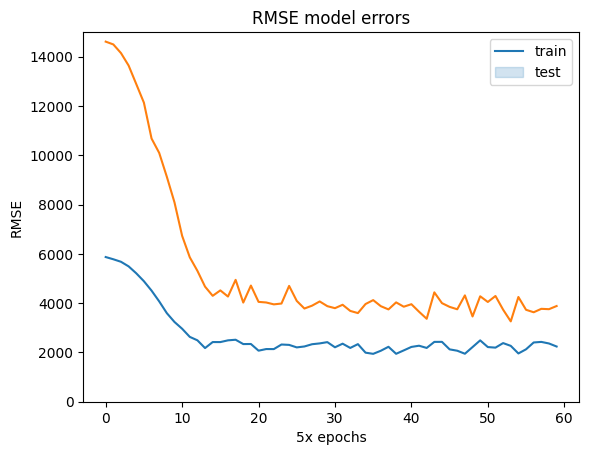

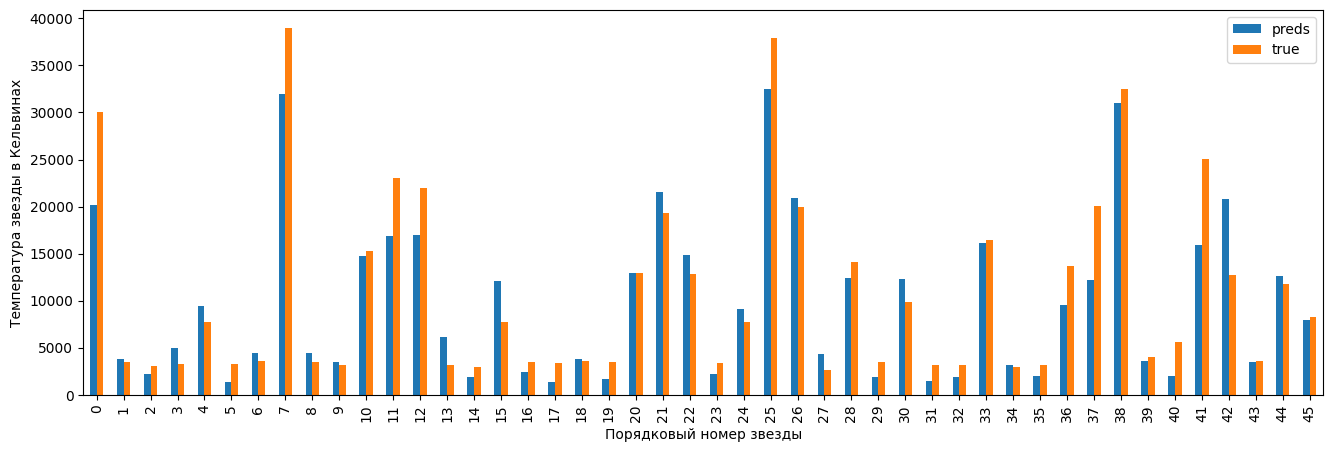

######################################################################


In [22]:
for row in data.iloc[:5].iterrows():
    print(f"Model with params dropout - {row[1]['dropout']}, \n\
          num_epoch - {row[1]['num_epoch']}, \n\
          batch_size - {row[1]['batch_size']}, \n\
          has last test RMSE error - {row[1]['test_scores_low20']:.2f}")
    sns.lineplot(y=row[1]['train_scores'], x=range(len(row[1]['train_scores'])))
    sns.lineplot(y=row[1]['test_scores'], x=range(len(row[1]['test_scores'])))
    plt.title('RMSE model errors')
    plt.ylabel('RMSE')
    plt.xlabel('5x epochs')
    plt.ylim(bottom=0, top=15000)
    plt.legend(['train', 'test'])
    plt.show()
    
    preds_series = pd.DataFrame(row[1]['test_preds'], columns=['preds'])
    test_series = pd.DataFrame(y_test.numpy(), columns=['true'])
    visual = pd.concat([preds_series, test_series], axis=1)

    visual.plot(kind='bar',
                figsize=(16, 5), xlabel = 'Порядковый номер звезды', ylabel = 'Температура звезды в Кельвинах')
    plt.show()    
    
    
    print('######################################################################')

## Выводы

По итогам подбора гиперпараметров удалось достичь необходимого уровня метрики RMSE полносвязной нейронной сети. Также можно заключить, что наиболее результативные (по метрике rmse) модели:
* не используют дропаут или его небольшие значения;
* имеют достаточно большой размер батча 16-32;
* тренировались значительное  количество эпох 200-300.

Между тем, можно отметить, что в соответствии с графической репрезентацией результатов предсказаний - топовые модели "ошибаются" практически идентично, поэтому дальнейшее качественное развитие модели скорее всего возможно только посредством изменения ее внутренних параметров.